# Below is my project Breakdown

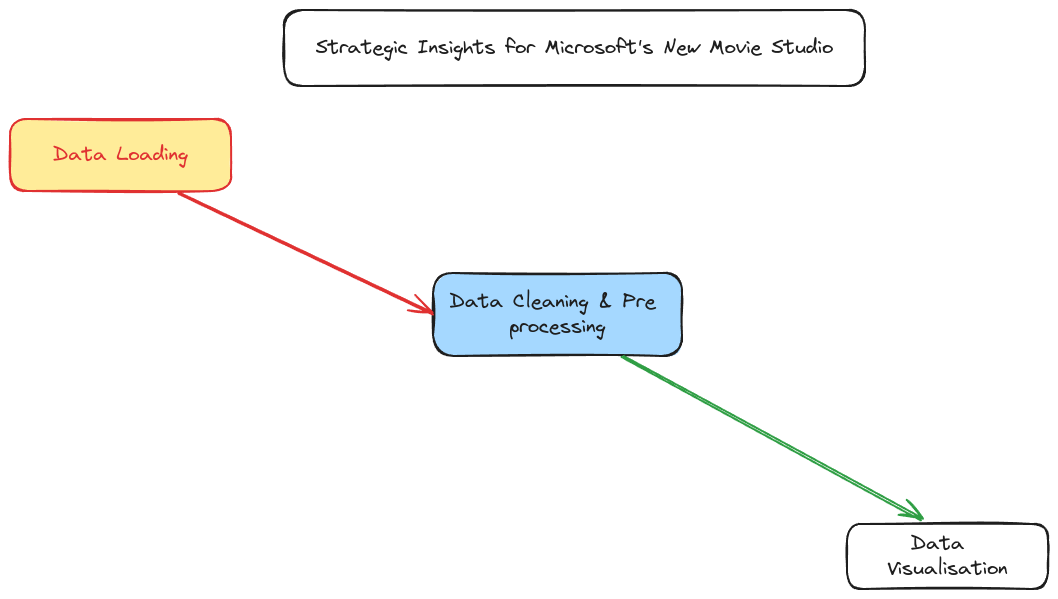

# Import all libraries

In [106]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collections
* I will use 3 types of datasets of movies and perform exploration

# First Dataset
* this deals with gross of movies showing also the year movie was released its title studio with all gross incomes

In [107]:
#Data loading using Pandas dataframe
data=pd.read_csv('data/bom.movie_gross.csv')
#Check the first five rows of  movie dataset
data.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


# Second Dataset
* Second Data Deals with Movies reviews

In [108]:
#Load the Data and check the fist five rows of the data
reviews = pd.read_csv('data/rt.reviews.tsv', sep='\t', encoding='latin1')
#Check the first five rows
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


# The third  Dataset
## This one deals with Movies budget 

In [109]:
#Load the budget data and check the first five rows
budget=pd.read_csv('data/tn.movie_budgets.csv')
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Fourth Dataset

In [110]:
#load the movies dataset
movies=pd.read_csv('data/tmdb.movies.csv')
#Check the head of the first five rows
movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


# Data Cleaning and Pre Processing

* The First one to be cleaned is the one involving Movies gross

In [111]:
#Check the shape of the data to know the number of rows and columns in the data
data.shape

(3387, 5)

* The movie  data contains 5 rows and 3387 columns  

In [112]:
#Check the columns of the movie data
data.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [113]:
#Check the infor of the data to know the categorical and non categorical data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [114]:
#Use Label encoder to be numerical
le = LabelEncoder()
for column in data.columns:
    if data[column].dtype == type(object):
        data[column] = le.fit_transform(data[column].astype(str))

In [115]:
#Check if the data is all numerical
data.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,3115,36,415000000.0,974,2010
1,174,36,334200000.0,1003,2010
2,1064,246,296000000.0,981,2010
3,1230,246,292600000.0,854,2010
4,2216,171,238700000.0,829,2010
5,3011,219,300500000.0,676,2010
6,1261,185,312400000.0,552,2010
7,2399,36,200800000.0,666,2010
8,673,238,251500000.0,518,2010
9,1149,171,217600000.0,489,2010


In [116]:
#CHeck the  null values of the data set
data.isnull().sum()

title              0
studio             0
domestic_gross    28
foreign_gross      0
year               0
dtype: int64

* I have decided to drop the null values since they were very few and may have no impact on the data. This will also improve data visualization

In [117]:
#drop the null values
data.dropna(inplace=True)

In [118]:
#Check is the null values has been imputed
data.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [119]:
#Check the statical Distribution of the data
data.describe()

,title,studio,domestic_gross,foreign_gross,year
count,3359.000000,3359.000000,3.359000e+03,3359.000000,3359.000000
mean,1693.991069,145.182197,2.874585e+07,828.277464,2013.968145
std,976.991527,73.186717,6.698250e+07,408.952233,2.479432
min,0.000000,0.000000,1.000000e+02,0.000000,2010.000000
25%,847.500000,89.000000,1.200000e+05,457.500000,2012.000000
50%,1696.000000,139.000000,1.400000e+06,984.000000,2014.000000
75%,2540.000000,215.000000,2.790000e+07,1204.000000,2016.000000
max,3385.000000,257.000000,9.367000e+08,1204.000000,2018.000000


In [120]:
#Check the duplicates
data.duplicated().sum()

0

In [121]:
#Check the the outliers in the dataset
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [122]:
# Determine outliers
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
# Print message if there are outliers
for column in outliers.index:
    if outliers[column] > 0:
        print(f'{column} has {outliers[column]} outliers')


domestic_gross has 406 outliers


In [123]:
#Below is the code to remove the ouliers in the Domestic gross column
Q1 = data['domestic_gross'].quantile(0.25)
Q3 = data['domestic_gross'].quantile(0.75)
IQR = Q3 - Q1

# Only keep rows in the dataframe that do not have outliers in the 'domestic_gross' column
data = data[~((data['domestic_gross'] < (Q1 - 1.5 * IQR)) | (data['domestic_gross'] > (Q3 + 1.5 * IQR)))]

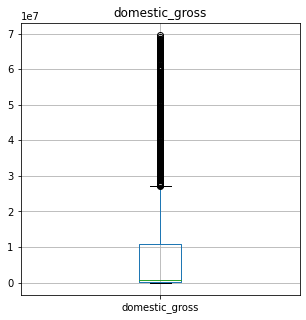

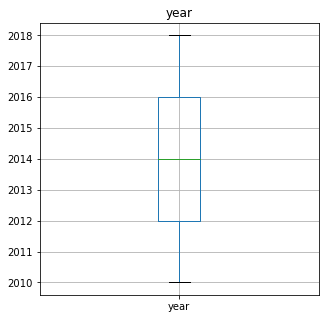

In [124]:
# Use box plot to check
for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(5, 5))
        data.boxplot([column])
        plt.title(column)
        plt.show()

# Second Dataset to be cleaned is the one that involves reviews

In [125]:
#Check the information of the data to know the numerical and non numerical data
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [126]:
#check the Shape of the data
reviews.shape

(54432, 8)

In [127]:
#Check the columns in the data
reviews.columns

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')

In [128]:
#CHeck the null Values in the dataset
reviews.isnull().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [129]:
reviews.dropna(inplace=True)

In [130]:
#Check the null values are eliminated
reviews.isnull().sum()

id            0
review        0
rating        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64

In [131]:
#Check the first 10 rows
reviews.head(10)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"
13,3,The anger over the injustice of the financial ...,B,fresh,Robert Roten,0,Laramie Movie Scope,"January 7, 2013"
14,3,For those who like their Cronenberg thick and ...,3/4,fresh,Marty Mapes,0,Movie Habit,"October 20, 2012"
15,3,For better or worse - often both - Cosmopolis ...,3/5,fresh,Adam Ross,0,The Aristocrat,"September 27, 2012"
16,3,For one of the smartest films I've seen in a w...,4/5,fresh,Patrick Kolan,0,Shotgun Cinema,"September 26, 2012"
17,3,Its major problem is that it's not cinematic.,B,fresh,Dennis Schwartz,0,Ozus' World Movie Reviews,"September 25, 2012"


In [132]:
# check the statistcal distribution of the  review dataset
reviews.describe()

,id,top_critic
count,33988.000000,33988.000000
mean,1050.648052,0.211163
std,585.403655,0.408140
min,3.000000,0.000000
25%,563.000000,0.000000
50%,1084.000000,0.000000
75%,1545.000000,0.000000
max,2000.000000,1.000000


# The third dataset is on Movies Budget

In [133]:
#Check the shape of the data
budget.shape

(5782, 6)

In [134]:
#Check the null vlaues in the dataset
budget.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [135]:
#Check the dubplicates in the budget data
budget.duplicated().sum()

0

In [136]:
#Check the infor of the data to the numerical and non numerical
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [137]:
#Check the columns in the dataset
budget.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [138]:
#Check the statiscal disribution in the data
budget.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


Outliers for id:
Empty DataFrame
Columns: [id, release_date, movie, production_budget, domestic_gross, worldwide_gross]
Index: []


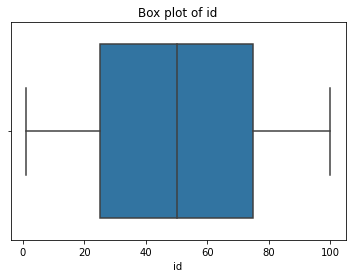

In [139]:
#Check outliers

# Iterate over the columns
for column in budget.select_dtypes(include=['float64', 'int64']).columns:
    # Calculate the IQR of the column
    Q1 = budget[column].quantile(0.25)
    Q3 = budget[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outliers
    outliers = budget[(budget[column] < (Q1 - 1.5 * IQR)) | (budget[column] > (Q3 + 1.5 * IQR))]

    # Print the outliers
    print(f"Outliers for {column}:")
    print(outliers)

    # Plot a boxplot of the column
    sns.boxplot(x=budget[column])
    plt.title(f'Box plot of {column}')
    plt.show()

# Data Preprocessing and Data Cleaning of the fouth Dataset

In [140]:
#Check the shape of the dataset
movies.shape

(26517, 10)

In [141]:
#Check the null values in the dataset
movies.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [142]:
#CHeck the duplicates in the dataset
movies.duplicated().sum()

0

In [143]:
#CHeck the columns in the movies dataset
movies.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [144]:
#Check the info in the dataset
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


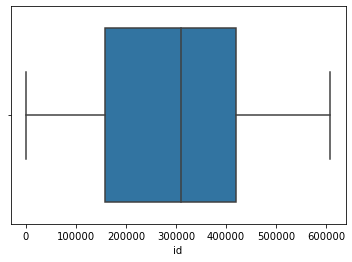

In [145]:
# Check for outliers in the 'id' column
sns.boxplot(x=movies['id'])

plt.show()

# Merging the four dataset to be one to enhance data exploration

In [146]:
# Create a new common column 'id' in each dataset
data['id'] = range(1, len(data) + 1)
reviews['id'] = range(1, len(reviews) + 1)
budget['id'] = range(1, len(budget) + 1)
movies['id'] = range(1, len(movies) + 1)


In [147]:
# Merge the datasets
merged_data = pd.merge(data, reviews, how='outer', on='id')
merged_data = pd.merge(merged_data, budget, how='outer', on='id')
merged_data = pd.merge(merged_data, movies, how='outer', on='id')


In [148]:
# Save the merged data to a csv file
merged_data.to_csv('merged_data.csv', index=False)

In [149]:
#Load the merged CSV file
df=pd.read_csv('data/merged_data.csv')
#Check the  first five rows in the data
df.head()

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (13,14,15,16,17,19,20,21,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,title_x,studio,domestic_gross_x,foreign_gross,year,id,review,rating,fresh,critic,...,worldwide_gross,Unnamed: 0,genre_ids,original_language,original_title,popularity,release_date_y,title_y,vote_average,vote_count
0,2085.0,205.0,60100000.0,413.0,2010.0,1,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,...,"$2,776,345,279",0.0,"[12, 14, 10751]",en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788.0
1,2999.0,215.0,67600000.0,346.0,2010.0,2,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,...,"$1,045,663,875",1.0,"[14, 12, 16, 10751]",en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610.0
2,1037.0,93.0,42800000.0,309.0,2010.0,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,...,"$149,762,350",2.0,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368.0
3,2961.0,36.0,63200000.0,196.0,2010.0,4,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,...,"$1,403,013,963",3.0,"[16, 35, 10751]",en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174.0
4,2323.0,36.0,42400000.0,85.0,2010.0,5,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,...,"$1,316,721,747",4.0,"[28, 878, 12]",en,Inception,27.920,2010-07-16,Inception,8.3,22186.0


In [150]:
#Check the shape to see the number of columns and rows in the merged data
df.shape

(33988, 27)

In [151]:
#Check the column names in the data
df.columns

Index(['title_x', 'studio', 'domestic_gross_x', 'foreign_gross', 'year', 'id',
       'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date', 'release_date_x', 'movie', 'production_budget',
       'domestic_gross_y', 'worldwide_gross', 'Unnamed: 0', 'genre_ids',
       'original_language', 'original_title', 'popularity', 'release_date_y',
       'title_y', 'vote_average', 'vote_count'],
      dtype='object')

In [152]:
#Check the null values in the dataset
df.isnull().sum()

title_x              31035
studio               31035
domestic_gross_x     31035
foreign_gross        31035
year                 31035
id                       0
review                   0
rating                   0
fresh                    0
critic                   0
top_critic               0
publisher                0
date                     0
release_date_x       28206
movie                28206
production_budget    28206
domestic_gross_y     28206
worldwide_gross      28206
Unnamed: 0            7471
genre_ids             7471
original_language     7471
original_title        7471
popularity            7471
release_date_y        7471
title_y               7471
vote_average          7471
vote_count            7471
dtype: int64

In [153]:
numeric_columns = ['domestic_gross_x', 'foreign_gross', 'year', 'production_budget',
                   'domestic_gross_y', 'worldwide_gross', 'popularity', 'vote_average', 'vote_count']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# For numerical columns, fill missing values with the column mean
for col in numeric_columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [154]:
# Check the null values in the data again
df.isnull().sum()

title_x              31035
studio               31035
domestic_gross_x         0
foreign_gross            0
year                     0
id                       0
review                   0
rating                   0
fresh                    0
critic                   0
top_critic               0
publisher                0
date                     0
release_date_x       28206
movie                28206
production_budget    33988
domestic_gross_y     33988
worldwide_gross      33988
Unnamed: 0            7471
genre_ids             7471
original_language     7471
original_title        7471
popularity               0
release_date_y        7471
title_y               7471
vote_average             0
vote_count               0
dtype: int64

In [155]:
# For numerical columns, fill missing values with the column mean
df['domestic_gross_x'].fillna(df['domestic_gross_x'].mean(), inplace=True)
df['foreign_gross'].fillna(df['foreign_gross'].mean(), inplace=True)
df['year'].fillna(df['year'].mean(), inplace=True)
df['production_budget'].fillna(df['production_budget'].mean(), inplace=True)
df['domestic_gross_y'].fillna(df['domestic_gross_y'].mean(), inplace=True)
df['worldwide_gross'].fillna(df['worldwide_gross'].mean(), inplace=True)
df['popularity'].fillna(df['popularity'].mean(), inplace=True)
df['vote_average'].fillna(df['vote_average'].mean(), inplace=True)
df['vote_count'].fillna(df['vote_count'].mean(), inplace=True)


In [156]:
# For categorical columns, fill missing values with the most common value (mode)
df['title_x'].fillna(df['title_x'].mode()[0], inplace=True)
df['studio'].fillna(df['studio'].mode()[0], inplace=True)
df['movie'].fillna(df['movie'].mode()[0], inplace=True)
df['release_date_x'].fillna(df['release_date_x'].mode()[0], inplace=True)
df['Unnamed: 0'].fillna(df['Unnamed: 0'].mode()[0], inplace=True)
df['genre_ids'].fillna(df['genre_ids'].mode()[0], inplace=True)
df['original_language'].fillna(df['original_language'].mode()[0], inplace=True)
df['original_title'].fillna(df['original_title'].mode()[0], inplace=True)
df['release_date_y'].fillna(df['release_date_y'].mode()[0], inplace=True)
df['title_y'].fillna(df['title_y'].mode()[0], inplace=True)

In [157]:
df.isnull().sum()

title_x                  0
studio                   0
domestic_gross_x         0
foreign_gross            0
year                     0
id                       0
review                   0
rating                   0
fresh                    0
critic                   0
top_critic               0
publisher                0
date                     0
release_date_x           0
movie                    0
production_budget    33988
domestic_gross_y     33988
worldwide_gross      33988
Unnamed: 0               0
genre_ids                0
original_language        0
original_title           0
popularity               0
release_date_y           0
title_y                  0
vote_average             0
vote_count               0
dtype: int64

In [158]:
#Drop the 3 columns in the dataset
df = df.drop(['production_budget', 'domestic_gross_y', 'worldwide_gross'], axis=1)

In [159]:
#check the null values
df.isnull().sum()

title_x              0
studio               0
domestic_gross_x     0
foreign_gross        0
year                 0
id                   0
review               0
rating               0
fresh                0
critic               0
top_critic           0
publisher            0
date                 0
release_date_x       0
movie                0
Unnamed: 0           0
genre_ids            0
original_language    0
original_title       0
popularity           0
release_date_y       0
title_y              0
vote_average         0
vote_count           0
dtype: int64

In [160]:
#Check the values counts of review
df['review'].value_counts()

full review at Movies for the Masses                                                                                                                                                                  15
full review in Greek                                                                                                                                                                                   9
Click to read review                                                                                                                                                                                   3
click to read the full review                                                                                                                                                                          3
A movie so literal that the character who wears an eye patch is named Patch, and where everything that happens is spelled out with the subtlety of a first-grade teacher introducing the alphabet.  

In [161]:
#Check the values count of popularity
df['popularity'].value_counts()

3.130912    7471
0.600000    7037
1.400000     649
0.840000     587
0.624000     104
            ... 
5.807000       1
6.145000       1
7.483000       1
6.230000       1
7.764000       1
Name: popularity, Length: 7426, dtype: int64

In [162]:
#Check the value counts of rating
df['rating'].value_counts()

3/4      3267
3/5      2971
4/5      2800
2/4      2442
2.5/4    2156
         ... 
2.2/5       1
4.2/5       1
3.1         1
1/2         1
1.8         1
Name: rating, Length: 182, dtype: int64

In [163]:
#Check the Value counts of vote_average
df['vote_average'].value_counts()

5.991281     7471
6.000000     1940
7.000000     1560
5.000000     1486
10.000000    1252
             ... 
9.400000        6
1.200000        3
1.400000        3
9.100000        2
9.700000        2
Name: vote_average, Length: 92, dtype: int64

In [164]:
df['domestic_gross_x'].value_counts()

9.627428e+06    31035
1.100000e+06       32
1.000000e+06       30
1.300000e+06       30
1.200000e+06       25
                ...  
2.620000e+04        1
4.730000e+04        1
1.960000e+05        1
2.190000e+04        1
4.260000e+05        1
Name: domestic_gross_x, Length: 1441, dtype: int64

In [166]:
# Ensure the columns are numeric
df['domestic_gross_x'] = pd.to_numeric(df['domestic_gross_x'], errors='coerce')
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce')

# Create 'revenue' column
df['revenue'] = df['domestic_gross_x'] + df['foreign_gross']

In [167]:
#Drop the unusued columns in the dataset
df.drop(['studio','review', 'domestic_gross_x', 'foreign_gross', 'publisher', 'date', 'year', 'Unnamed: 0','release_date_x','title_y','title_x',], axis=1, inplace=True)


In [168]:
df.head()

,id,rating,fresh,critic,top_critic,movie,genre_ids,original_language,original_title,popularity,release_date_y,vote_average,vote_count,revenue
0,1,3/5,fresh,PJ Nabarro,0,Avatar,"[12, 14, 10751]",en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7,10788.0,60100413.0
1,2,C,rotten,Eric D. Snider,0,Pirates of the Caribbean: On Stranger Tides,"[14, 12, 16, 10751]",en,How to Train Your Dragon,28.734,2010-03-26,7.7,7610.0,67600346.0
2,3,2/5,rotten,Matt Kelemen,0,Dark Phoenix,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,6.8,12368.0,42800309.0
3,4,B-,fresh,Emanuel Levy,0,Avengers: Age of Ultron,"[16, 35, 10751]",en,Toy Story,28.005,1995-11-22,7.9,10174.0,63200196.0
4,5,2/4,rotten,Christian Toto,0,Star Wars Ep. VIII: The Last Jedi,"[28, 878, 12]",en,Inception,27.920,2010-07-16,8.3,22186.0,42400085.0


In [169]:
#Check the Value count of top_critic
df['top_critic'].value_counts()

0    26811
1     7177
Name: top_critic, dtype: int64

In [170]:
# convert 'rating', 'popularity', 'vote_average', 'top_critic', 'revenue' to numeric
for col in ['rating', 'popularity', 'vote_average', 'top_critic', 'revenue']:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [171]:
# Convert 'release_date_y' to datetime
df['release_date_y'] = pd.to_datetime(df['release_date_y'])


In [172]:
#Check the remaining columns in merged dataset
df.columns

Index(['id', 'rating', 'fresh', 'critic', 'top_critic', 'movie', 'genre_ids',
       'original_language', 'original_title', 'popularity', 'release_date_y',
       'vote_average', 'vote_count', 'revenue'],
      dtype='object')

# Exploratory Data Analaysis

In [173]:
#Check the statistical Distribution of the data
df.describe()

,id,rating,top_critic,popularity,vote_average,vote_count,revenue
count,33988.000000,639.000000,33988.000000,33988.000000,33988.000000,33988.000000,3.398800e+04
mean,16994.500000,5.090923,0.211163,3.130912,5.991281,194.224837,9.628288e+06
std,9811.634811,2.754975,0.408140,3.846880,1.636667,848.796138,4.930221e+06
min,1.000000,0.000000,0.000000,0.600000,0.000000,1.000000,8.530000e+02
25%,8497.750000,2.700000,0.000000,0.670000,5.300000,2.000000,9.628288e+06
50%,16994.500000,6.000000,0.000000,2.161000,5.991281,12.000000,9.628288e+06
75%,25491.250000,8.000000,0.000000,3.130912,6.800000,194.224837,9.628288e+06
max,33988.000000,9.800000,1.000000,80.773000,10.000000,22186.000000,6.950099e+07


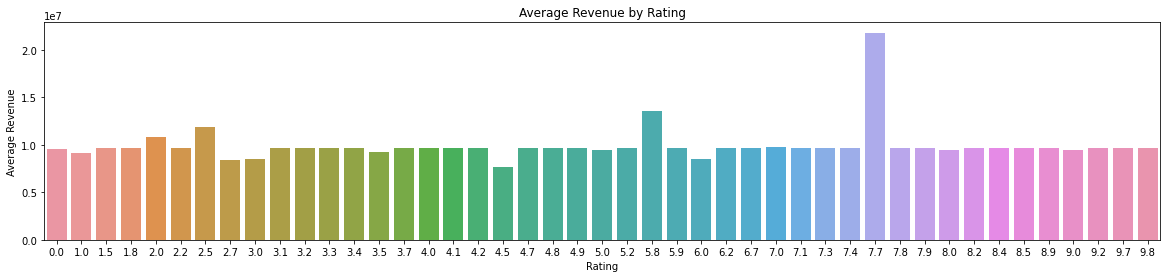

In [174]:
# Calculate the average revenue for each rating
average_revenue_by_rating = df.groupby('rating')['revenue'].mean().reset_index()

plt.figure(figsize=(20, 4))
sns.barplot(data=average_revenue_by_rating, x='rating', y='revenue')

# Add a title
plt.title('Average Revenue by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Revenue')

plt.show()


### The movies with highest rating  of 7.7 also has the highest revenue but the movie with lowest rating does not necessarily mean the lowest average revenue


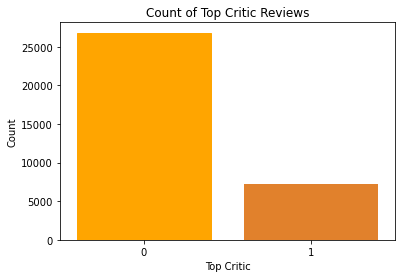

In [175]:
plt.figure(figsize=(6, 4))
bar = sns.countplot(data=df, x='top_critic')
bar.patches[0].set_color('orange')

# Add a title
plt.title('Count of Top Critic Reviews')
plt.xlabel('Top Critic')
plt.ylabel('Count')

plt.show()

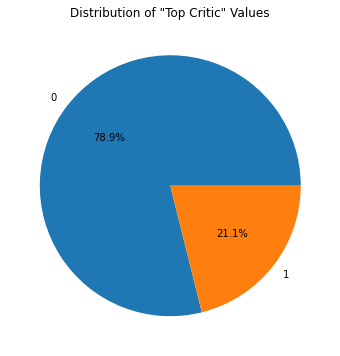

In [176]:
# Count the occurrences of each value in the 'top_critic' column
top_critic_counts = df['top_critic'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(top_critic_counts, labels=top_critic_counts.index, autopct='%1.1f%%')
plt.title('Distribution of "Top Critic" Values')
plt.show()

### There were more movies without critic than those with. From the pie chart 79% had 0 critic

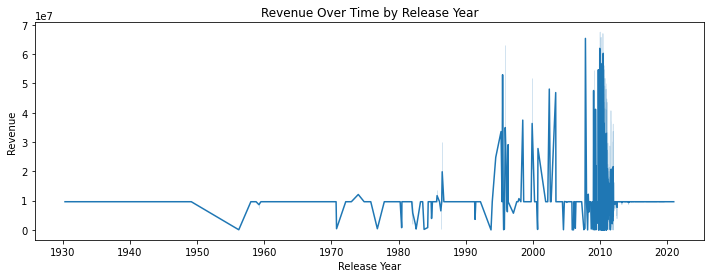

In [177]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=df, x='release_date_y', y='revenue')
# Add a title
plt.title('Revenue Over Time by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Revenue')
plt.show()

### Before mid 90s the revenue generated from the movies was very little. Probably because of exposure. Around 2010 there seem to have a new generation that may have liked movies and no wonder the high revenue. More exploration may show other factors that may have led to the drop in revenue after 2020 

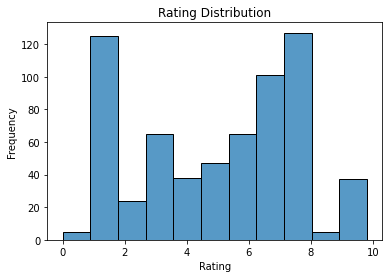

In [178]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='rating')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


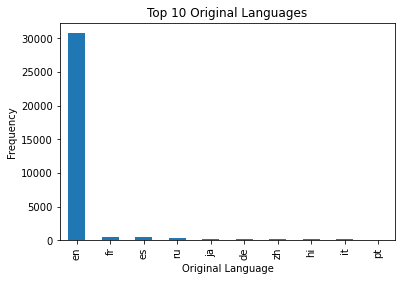

In [179]:
plt.figure(figsize=(6, 4))
df['original_language'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Original Languages')
plt.xlabel('Original Language')
plt.ylabel('Frequency')
plt.show()

### More people watched English movies

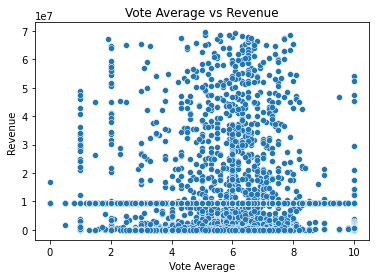

In [180]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='vote_average', y='revenue')
plt.title('Vote Average vs Revenue')
plt.xlabel('Vote Average')
plt.ylabel('Revenue')
plt.show()

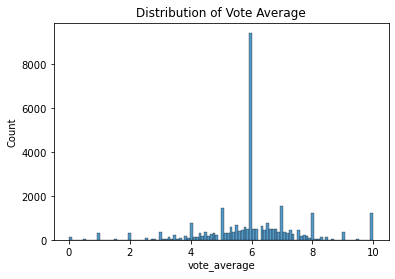

In [181]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='vote_average')
plt.title('Distribution of Vote Average')
plt.show()

### Many movies have average voting

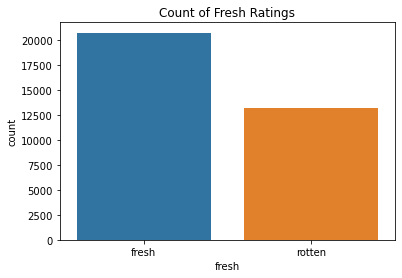

In [182]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='fresh')
plt.title('Count of Fresh Ratings')
plt.show()

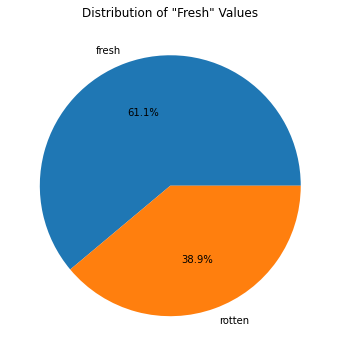

In [183]:
# Count the occurrences of each value in the 'fresh' column
fresh_counts = df['fresh'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(fresh_counts, labels=fresh_counts.index, autopct='%1.1f%%')
plt.title('Distribution of "Fresh" Values')
plt.show()

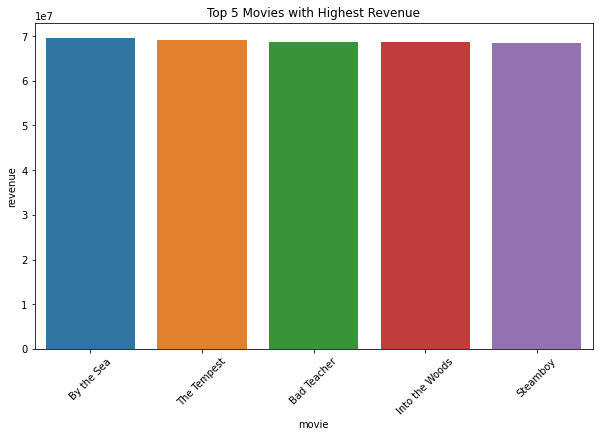

In [184]:
top_5_movies = df.nlargest(5, 'revenue')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_movies, x='movie', y='revenue')
plt.title('Top 5 Movies with Highest Revenue')
plt.xticks(rotation=45)
plt.show()

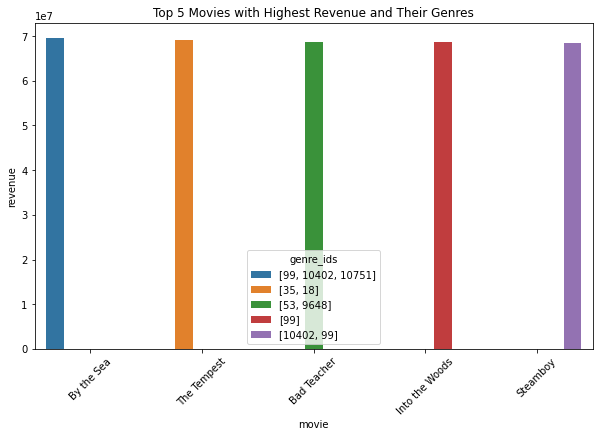

In [185]:
top_5_movies = df.nlargest(5, 'revenue')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_movies, x='movie', y='revenue', hue='genre_ids')
plt.title('Top 5 Movies with Highest Revenue and Their Genres')
plt.xticks(rotation=45)
plt.show()

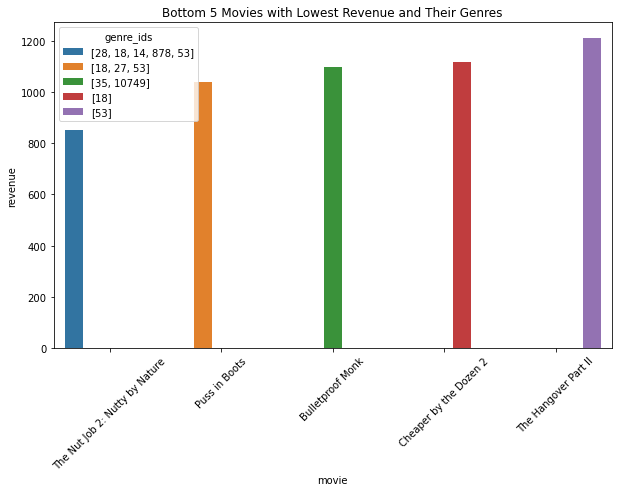

In [186]:
bottom_5_movies = df.nsmallest(5, 'revenue')

plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_5_movies, x='movie', y='revenue', hue='genre_ids')
plt.title('Bottom 5 Movies with Lowest Revenue and Their Genres')
plt.xticks(rotation=45)
plt.show()

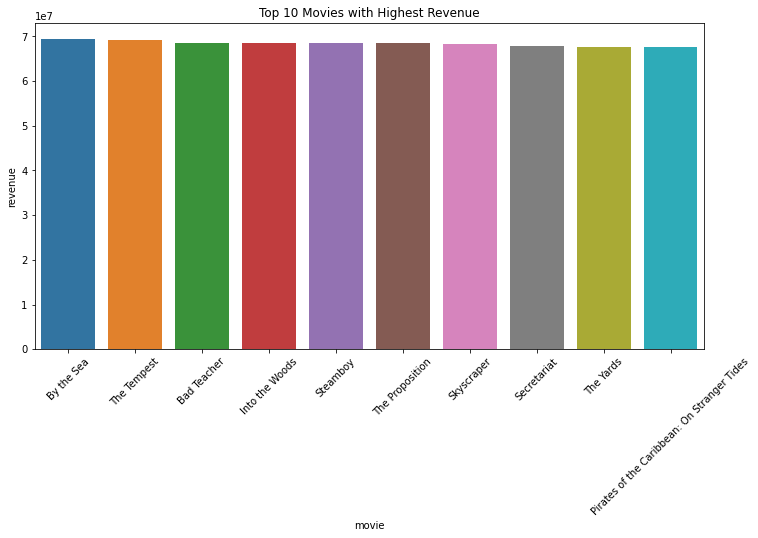

In [187]:
top_movies = df.nlargest(10, 'revenue')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_movies, x='movie', y='revenue')
plt.title('Top 10 Movies with Highest Revenue')
plt.xticks(rotation=45)
plt.show()

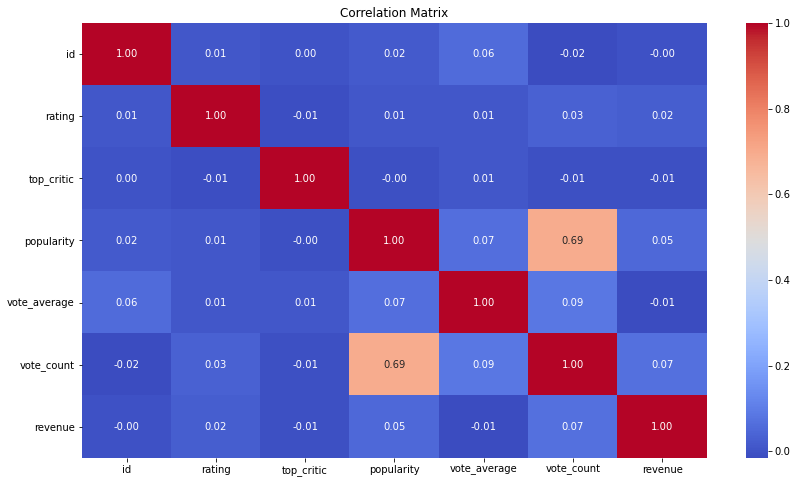

In [196]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()